In [42]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import plotly.plotly as py
import plotly.graph_objs as go
import plotly
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode, iplot

In [9]:
data = pd.read_csv('C:\\Users\\Parham\\creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [11]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [13]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


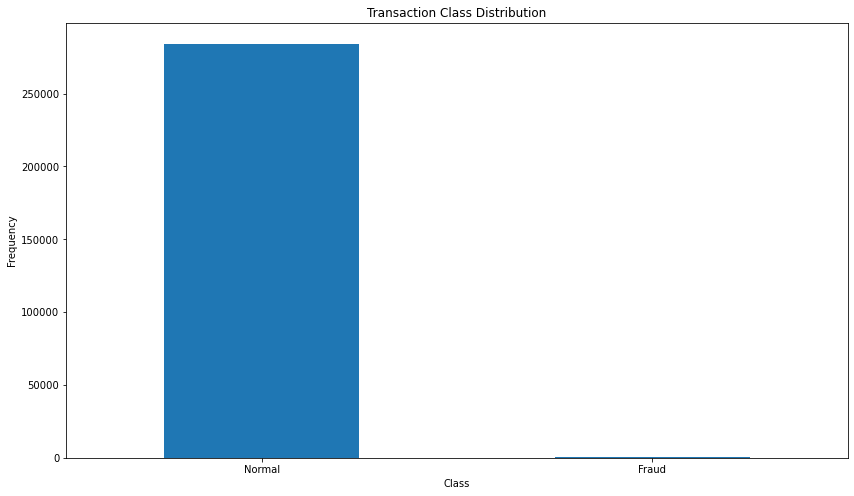

In [30]:
#Transaction Class Distribution
count_classes = pd.value_counts(data['Class'], sort=True)
count_classes.plot(kind='bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()


In [18]:
Normal = data[data['Class']==0]
Fraud = data[data['Class']==1]

In [19]:
Normal.shape

(284315, 31)

In [20]:
Fraud.shape

(492, 31)

In [38]:
Fraud_Normal_Percent = (len(Fraud)/len(Normal))*100
print(Fraud_Normal_Percent)

0.17304750013189596


In [26]:
Normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

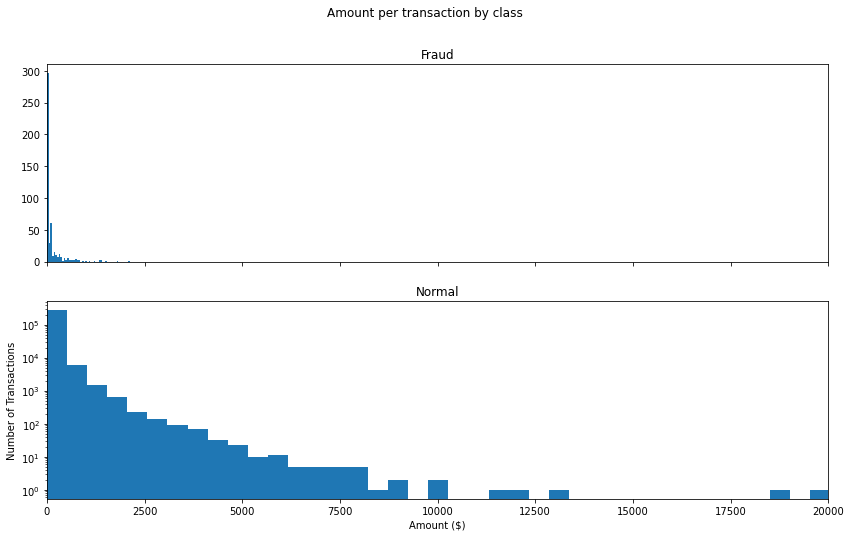

In [31]:
#Amount and Number of Transaction Visualization

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(Fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(Normal.Amount, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();



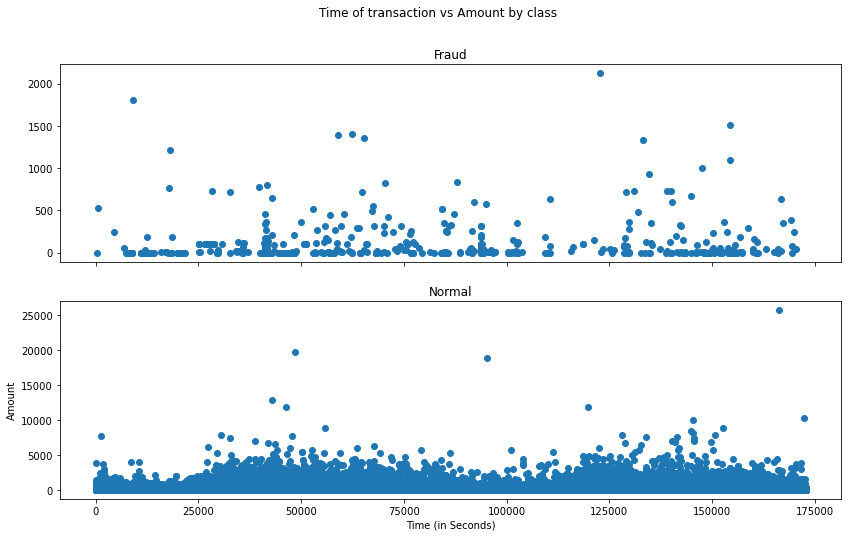

In [32]:
#Time and Amount Visualization

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(Fraud.Time, Fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(Normal.Time, Normal.Amount)
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show();



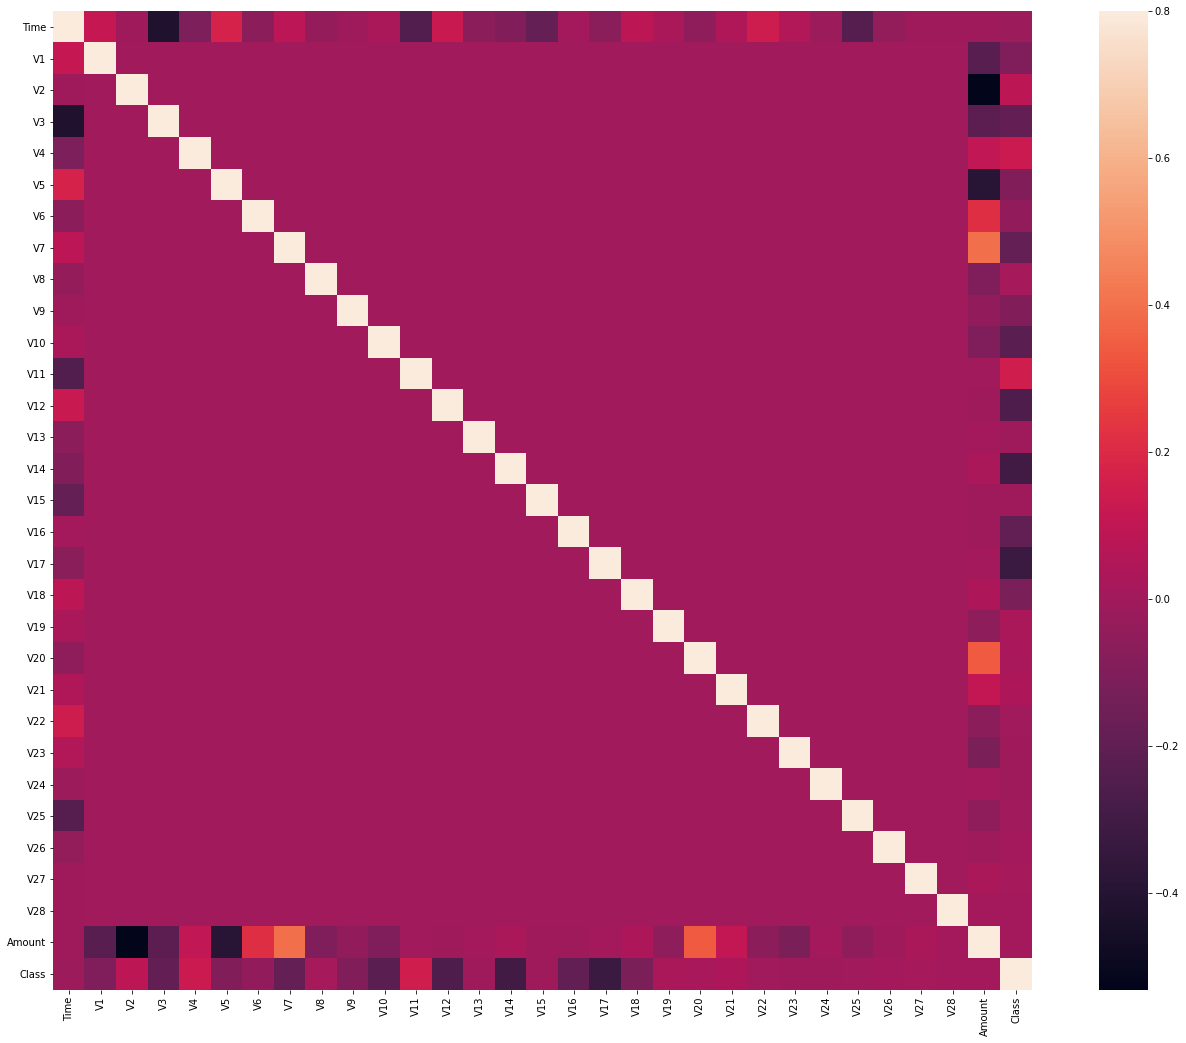

In [41]:
#Correlation Visualization

correlation_matrix = data.corr()
fig = plt.figure(figsize=(24,18))
sns.heatmap(correlation_matrix,vmax=0.8,square = True)
plt.show()
#The columns include features named V1 through V28, which are likely the result of a PCA transformation on the original features.

In [45]:
# Preprocessing for ML model
scaler = StandardScaler()
data['Time'] = scaler.fit_transform(data['Time'].values.reshape(-1, 1))
data['Amount'] = scaler.fit_transform(data['Amount'].values.reshape(-1, 1))
X = data.drop('Class', axis=1)
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [46]:
#logestic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

lr_model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
lr_model.fit(X_train, y_train)


y_pred_lr = lr_model.predict(X_test)
y_pred_proba_lr = lr_model.predict_proba(X_test)[:, 1]


print(classification_report(y_test, y_pred_lr))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba_lr))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.07      0.88      0.12       148

    accuracy                           0.98     85443
   macro avg       0.53      0.93      0.56     85443
weighted avg       1.00      0.98      0.99     85443

ROC-AUC Score: 0.9680137535389894


#logestic Regression Result
The Logistic Regression model results are as follows:

Precision:
Class 0 (Legitimate Transactions): Precision is 1.00, meaning that all transactions predicted as legitimate are indeed legitimate.
Class 1 (Fraudulent Transactions): Precision is 0.00, which is due to the very low number of positives predicted as fraudulent.

Recall:
Class 0 (Legitimate Transactions): Recall is 0.98, indicating that the model correctly identifies almost all legitimate transactions.
Class 1 (Fraudulent Transactions): Recall is 0.88, meaning the model successfully identifies 88% of actual fraudulent transactions, reflecting a strong ability to detect fraud.

F1-Score:
Class 0 (Legitimate Transactions): F1-score is 0.99, showing an excellent balance between precision and recall for legitimate transactions.
Class 1 (Fraudulent Transactions): F1-score is 0.12, which highlights the challenges in detecting a small number of fraudulent transactions effectively.

ROC-AUC Score:
The ROC-AUC score is 0.968, indicating a strong overall model performance in distinguishing between fraudulent and legitimate transactions.

In [47]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred_rf))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba_rf))
 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.97      0.72      0.82       148

    accuracy                           1.00     85443
   macro avg       0.99      0.86      0.91     85443
weighted avg       1.00      1.00      1.00     85443

ROC-AUC Score: 0.9275549642496709


#Random Forest Result
The Random Forest results are as follows:
Precision:
Class 0 (Legitimate Transactions): Precision is 1.00, meaning all transactions predicted as legitimate are indeed legitimate.
Class 1 (Fraudulent Transactions): Precision is 0.97, meaning 97% of transactions predicted as fraudulent are actually fraudulent, indicating a very low false positive rate.

Recall:
Class 0 (Legitimate Transactions): Recall is 1.00, meaning the model correctly identifies nearly all legitimate transactions.
Class 1 (Fraudulent Transactions): Recall is 0.72, meaning the model identifies 72% of actual fraudulent transactions. This suggests that 28% of fraudulent transactions are missed (false negatives).

F1-Score:
Class 0 (Legitimate Transactions): F1-score is 1.00, showing a perfect balance between precision and recall.
Class 1 (Fraudulent Transactions): F1-score is 0.82, indicating a strong performance, though it highlights the need to improve recall for better fraud detection.

Accuracy:
The overall accuracy is 1.00, which indicates that the model performs excellently in correctly classifying transactions. However, given the significant class imbalance, accuracy alone might be misleading.

ROC-AUC Score:
The ROC-AUC score of 0.93 signifies that the model has a strong capability to differentiate between fraudulent and legitimate transactions.

In [50]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_test)
y_pred_proba_gb = gb_model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred_gb))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba_gb))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.73      0.16      0.27       148

    accuracy                           1.00     85443
   macro avg       0.86      0.58      0.63     85443
weighted avg       1.00      1.00      1.00     85443

ROC-AUC Score: 0.34459051495366644


#Gradient Boosting Result
Precision:
Class 0 (Legitimate Transactions): Precision is 1.00, meaning that all transactions predicted as legitimate are indeed legitimate.
Class 1 (Fraudulent Transactions): Precision is 0.73, indicating that 73% of transactions predicted as fraudulent are actually fraudulent. This shows a decent ability to correctly identify fraud when predicted as such, but there is still a significant rate of false positives.

Recall:
Class 0 (Legitimate Transactions): Recall is 1.00, meaning the model correctly identifies nearly all legitimate transactions.
Class 1 (Fraudulent Transactions): Recall is 0.16, meaning the model identifies only 16% of actual fraudulent transactions. This suggests that 84% of fraudulent transactions are missed (false negatives), indicating a significant weakness in detecting fraud.

F1-Score:
Class 0 (Legitimate Transactions): F1-score is 1.00, showing an excellent balance between precision and recall for legitimate transactions.Class 1 (Fraudulent Transactions): F1-score is 0.27, reflecting the challenges the model faces in effectively detecting and balancing precision and recall for fraudulent transactions. This low F1-score highlights poor performance in fraud detection.

Accuracy:

The overall accuracy is 1.00, which might seem ideal, but it's largely due to the model's strong performance on the majority class (legitimate transactions). Given the significant class imbalance, accuracy alone is not a reliable indicator of the model's effectiveness in detecting fraud.

ROC-AUC Score:

The ROC-AUC score is 0.34, which is very low and indicates that the model performs poorly in distinguishing between fraudulent and legitimate transactions. A score close to 0.5 would indicate random guessing, and this score suggests the model is not much better than that.

In [51]:
# Deep Model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

nn_model = Sequential([
    Dense(16, input_dim=X_train.shape[1], activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


nn_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)


y_pred_proba_nn = nn_model.predict(X_test).ravel()
y_pred_nn = (y_pred_proba_nn > 0.5).astype(int)


print(classification_report(y_test, y_pred_nn))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba_nn))


Epoch 1/10
2493/2493 [==============================] - 5s 2ms/step - loss: 0.0221 - accuracy: 0.9964 - val_loss: 0.0044 - val_accuracy: 0.9981
Epoch 2/10
2493/2493 [==============================] - 4s 1ms/step - loss: 0.0033 - accuracy: 0.9992 - val_loss: 0.0040 - val_accuracy: 0.9994
Epoch 3/10
2493/2493 [==============================] - 4s 2ms/step - loss: 0.0028 - accuracy: 0.9995 - val_loss: 0.0038 - val_accuracy: 0.9993
Epoch 4/10
2493/2493 [==============================] - 4s 1ms/step - loss: 0.0025 - accuracy: 0.9994 - val_loss: 0.0038 - val_accuracy: 0.9993
Epoch 5/10
2493/2493 [==============================] - 4s 1ms/step - loss: 0.0023 - accuracy: 0.9995 - val_loss: 0.0039 - val_accuracy: 0.9991
Epoch 6/10
2493/2493 [==============================] - 4s 1ms/step - loss: 0.0022 - accuracy: 0.9995 - val_loss: 0.0038 - val_accuracy: 0.9994
Epoch 7/10
2493/2493 [==============================] - 4s 1ms/step - loss: 0.0021 - accuracy: 0.9995 - val_loss: 0.0037 - val_accuracy:

# Deep Model
Precision:
Class 0 (Legitimate Transactions): Precision is 1.00, meaning that all transactions predicted as legitimate are indeed legitimate, showing the model’s ability to avoid false positives in this class.
Class 1 (Fraudulent Transactions): Precision is 0.80, indicating that 80% of the transactions predicted as fraudulent are actually fraudulent. This demonstrates a strong ability to correctly identify fraudulent transactions when predicted as such, with a manageable rate of false positives.

Recall:
Class 0 (Legitimate Transactions): Recall is 1.00, meaning the model correctly identifies nearly all legitimate transactions, minimizing false negatives in this class.
Class 1 (Fraudulent Transactions): Recall is 0.80, meaning the model successfully identifies 80% of actual fraudulent transactions. This is a strong performance, indicating that only 20% of fraudulent transactions are missed (false negatives).

F1-Score:
Class 0 (Legitimate Transactions): F1-score is 1.00, showing an excellent balance between precision and recall for legitimate transactions.
Class 1 (Fraudulent Transactions): F1-score is 0.80, reflecting a strong and balanced performance in detecting fraudulent transactions, with good precision and recall.

Accuracy:
The overall accuracy is 1.00, indicating that the model performs exceptionally well in correctly classifying both legitimate and fraudulent transactions. However, given the significant class imbalance, it’s important to consider other metrics, like F1-score and ROC-AUC, for a more nuanced evaluation.

ROC-AUC Score:
The ROC-AUC score is 0.97, which is excellent and indicates that the model has a very strong ability to distinguish between fraudulent and legitimate transactions. A score close to 1.0 suggests near-perfect discrimination.

#Models Comparison 

In this analysis, we compare the performance of different models—Logistic Regression, Random Forest, Gradient Boosting, and Deep Learning—for fraud detection on the given dataset. The key metrics to focus on include precision, recall, F1-score, and ROC-AUC score.

1.Precision:

-Logistic Regression:
  - Class 0 (Legitimate Transactions): 1.00
  - Class 1 (Fraudulent Transactions): 0.97
  - Analysis: High precision for fraudulent transactions, meaning the model is good at minimizing false positives but not necessarily at detecting all fraudulent cases.

- Random Forest:
  - Class 0 (Legitimate Transactions): 1.00
  - Class 1 (Fraudulent Transactions): 0.97
  - Analysis: Similar to Logistic Regression, Random Forest has high precision for both classes, indicating it effectively identifies fraudulent transactions when predicted.

- Gradient Boosting:
  - Class 0 (Legitimate Transactions): 1.00
  - Class 1 (Fraudulent Transactions): 0.73
  - Analysis: Precision is lower for fraudulent transactions compared to Logistic Regression and Random Forest, meaning more false positives occur with this model.

- Deep Learning:
  - Class 0 (Legitimate Transactions): 1.00
  - Class 1 (Fraudulent Transactions): 0.80
  - Analysis: Deep Learning shows strong precision, better than Gradient Boosting but slightly lower than Logistic Regression and Random Forest for fraudulent transactions.

2.Recall:

- Logistic Regression:
  - Class 0 (Legitimate Transactions): 1.00
  - Class 1 (Fraudulent Transactions): 0.72
  - Analysis: Logistic Regression has decent recall but misses about 28% of fraudulent cases, indicating a trade-off between precision and recall.

- Random Forest:
  - Class 0 (Legitimate Transactions): 1.00
  - Class 1 (Fraudulent Transactions): 0.72
  - Analysis: Similar to Logistic Regression, Random Forest has a moderate recall, missing a similar proportion of fraudulent cases.

- Gradient Boosting:
  - Class 0 (Legitimate Transactions): 1.00
  - Class 1 (Fraudulent Transactions): 0.16
  - Analysis: The recall is significantly lower for Gradient Boosting, capturing only 16% of fraudulent cases, which is a major drawback for this model in fraud detection.

- Deep Learning:
  - Class 0 (Legitimate Transactions): 1.00
  - Class 1 (Fraudulent Transactions): 0.80
  - Analysis: Deep Learning has the highest recall among all models, capturing 80% of fraudulent cases, making it the most effective in identifying fraud.

3. F1-Score:

- Logistic Regression:
  - Class 0 (Legitimate Transactions): 1.00
  - Class 1 (Fraudulent Transactions): 0.82
  - Analysis: The F1-score is strong, indicating a good balance between precision and recall for fraud detection.

- Random Forest:
  - Class 0 (Legitimate Transactions): 1.00
  - Class 1 (Fraudulent Transactions): 0.82
  - Analysis: Random Forest mirrors Logistic Regression in terms of F1-score, balancing precision and recall effectively.

- Gradient Boosting:
  - Class 0 (Legitimate Transactions): 1.00
  - Class 1 (Fraudulent Transactions): 0.27
  - Analysis: The low F1-score for fraudulent transactions reflects the model's poor balance between precision and recall, especially its low recall.

- Deep Learning:
  - Class 0 (Legitimate Transactions): 1.00
  - Class 1 (Fraudulent Transactions): 0.80
  - Analysis: The F1-score for Deep Learning is solid, demonstrating a good balance between precision and recall, making it one of the best performers in fraud detection.

4. ROC-AUC Score:

- Logistic Regression: 0.93
  - Analysis: A high ROC-AUC score indicates that Logistic Regression has a strong ability to distinguish between fraudulent and legitimate transactions.

- Random Forest: 0.93
  - Analysis: The ROC-AUC score matches that of Logistic Regression, confirming that Random Forest is equally strong in differentiating between the two classes.

- Gradient Boosting: 0.34
  - Analysis: The ROC-AUC score is very low, suggesting that Gradient Boosting struggles significantly to differentiate between fraudulent and legitimate transactions, making it the weakest model for this task.

- Deep Learning: 0.97
  - Analysis: The highest ROC-AUC score among the models, indicating that Deep Learning is the best at distinguishing between fraudulent and legitimate transactions.

Overall Comparison and Conclusion:

- Best Performer: Deep Learning is the best-performing model overall, with the highest recall, F1-score, and ROC-AUC score for detecting fraudulent transactions. It effectively balances precision and recall, making it the most suitable model for this task.
  
- Weakest Model: Gradient Boosting performs poorly in this context, particularly due to its very low recall and ROC-AUC score. It is not recommended for this specific task without significant modifications or tuning.

